In [4]:
import os
import pandas as pd
import numpy as np
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set working directory here
WD = '/Users/evan/Documents/School/MSDS/msds-capstone/vm-spinal-risk/vm-spinal-risk'

In [6]:
df = pd.read_csv(os.path.join(WD, 'data/all_risk_processed.csv'))

In [7]:
df['spin_surg'] = np.where(df['prior_surg'] == 0 & np.isnan(df['spin_surg']),
                           0, df['spin_surg'])
df['succ_surg'] = np.where(df['prior_surg'] == 0 & np.isnan(df['succ_surg']),
                           0, df['succ_surg'])

In [8]:
corr_df = df.filter(regex='odi_final|spinal_risk_score|age$|sex|height_m|weight_kg|ethni|income|educa|_surg|bmi|dospert_|ADI_').copy()
corr_df['ADI_NATRANK'] = pd.to_numeric(corr_df['ADI_NATRANK'], errors='coerce')
corr_df['ADI_STATERNK'] = pd.to_numeric(corr_df['ADI_STATERNK'], errors='coerce')
corr_df.dropna(inplace=True)

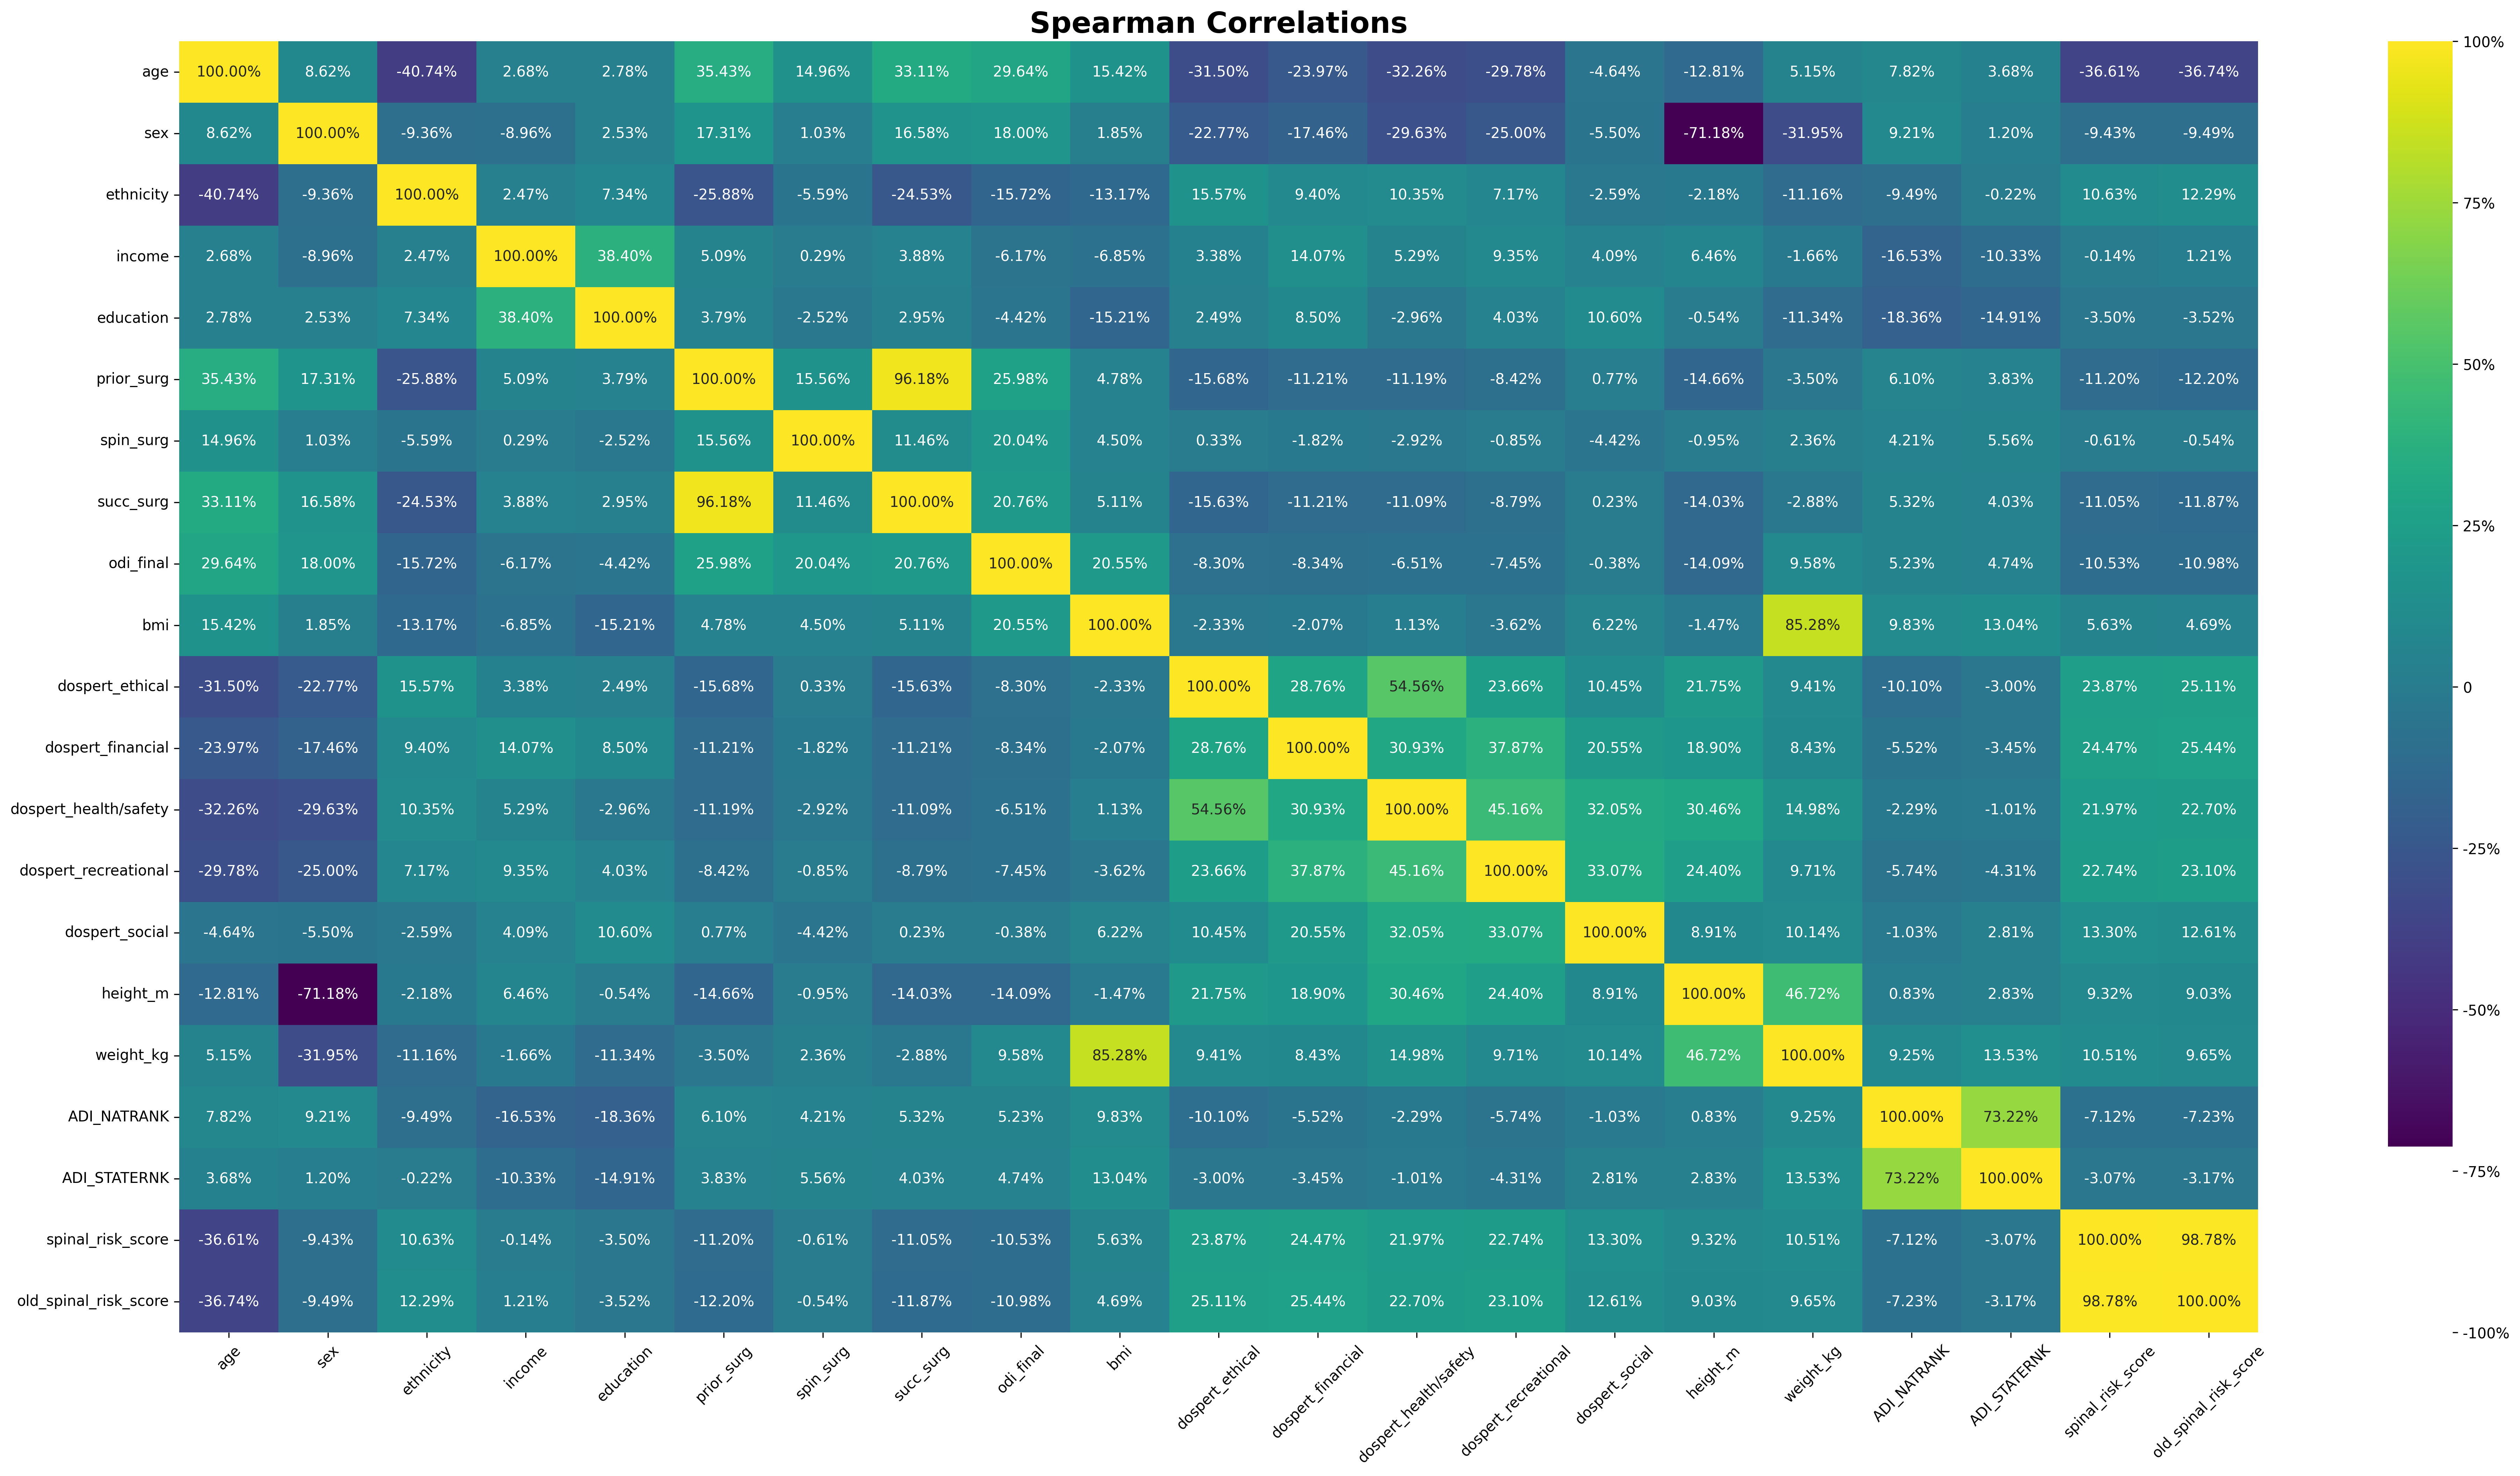

In [9]:
plt.figure(figsize=(32, 16), dpi=300)
ax = sns.heatmap(corr_df.corr(method='spearman'), annot=True, cmap='viridis', fmt='.2%')
plt.xticks(rotation=45)
plt.title('Spearman Correlations', fontsize=20, weight='bold')
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -.75, -.5, -.25, 0, .25, .5, .75, 1])
cbar.set_ticklabels(['-100%', '-75%', '-50%', '-25%', '0', '25%', '50%', '75%', '100%'])
plt.savefig(os.path.join(WD, 'figures/odi_risk_correlation.png'), bbox_inches='tight')

In [10]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data['feature'] = corr_df.columns 
  
# calculating VIF for each feature 
vif_data['vif'] = [variance_inflation_factor(corr_df.values, i) 
                   for i in range(len(corr_df.columns))]
vif_data.sort_values(by='vif', ascending=False, inplace=True)
vif_data

feature          vif
19      spinal_risk_score  1319.406205
20  old_spinal_risk_score   703.709616
15               height_m   226.598076
9                     bmi   197.625607
16              weight_kg   196.033073
5              prior_surg    56.007555
7               succ_surg    50.721922
14         dospert_social    25.896065
1                     sex    18.299917
4               education    16.349766
0                     age    14.553523
12  dospert_health/safety    11.231484
10        dospert_ethical    10.175650
18           ADI_STATERNK     9.963241
11      dospert_financial     9.303054
17            ADI_NATRANK     9.229098
13   dospert_recreational     6.681799
3                  income     4.204497
2               ethnicity     3.197940
8               odi_final     2.491973
6               spin_surg     1.153632

In [11]:
df.columns

Index(['Unnamed: 0', 'record_id', 'risk_1_timestamp', 'age', 'sex', 'height',
       'weight', 'zipcode', 'ethnicity', 'income', 'education', 'prior_surg',
       'spin_surg', 'succ_surg', 'religion', 'odi_1', 'odi_2', 'odi_3',
       'odi_4', 'odi_5', 'odi_6', 'odi_7', 'odi_8', 'odi_9', 'odi_10',
       'exer_50improv_1drop', 'exer_50improv_10drop', 'exer_50improv_50drop',
       'exer_50improv_90drop', 'att_check_1', 'exer_90improv_1drop',
       'exer_90improv_10drop', 'exer_90improv_50drop', 'exer_90improv_90drop',
       'exer_50pain_1death', 'exer_50pain_10death', 'exer_50pain_50death',
       'exer_90pain_1death', 'exer_90pain_10death', 'exer_90pain_50death',
       'work_50improv_1drop', 'work_50improv_10drop', 'work_50improv_50drop',
       'work_50improv_90drop', 'work_90improv_1drop', 'work_90improv_10drop',
       'work_90improv_50drop', 'work_50improv_1para', 'work_50improv_10para',
       'work_50improv_50para', 'work_50improv_90para', 'work_90improv_1para',
       'work_

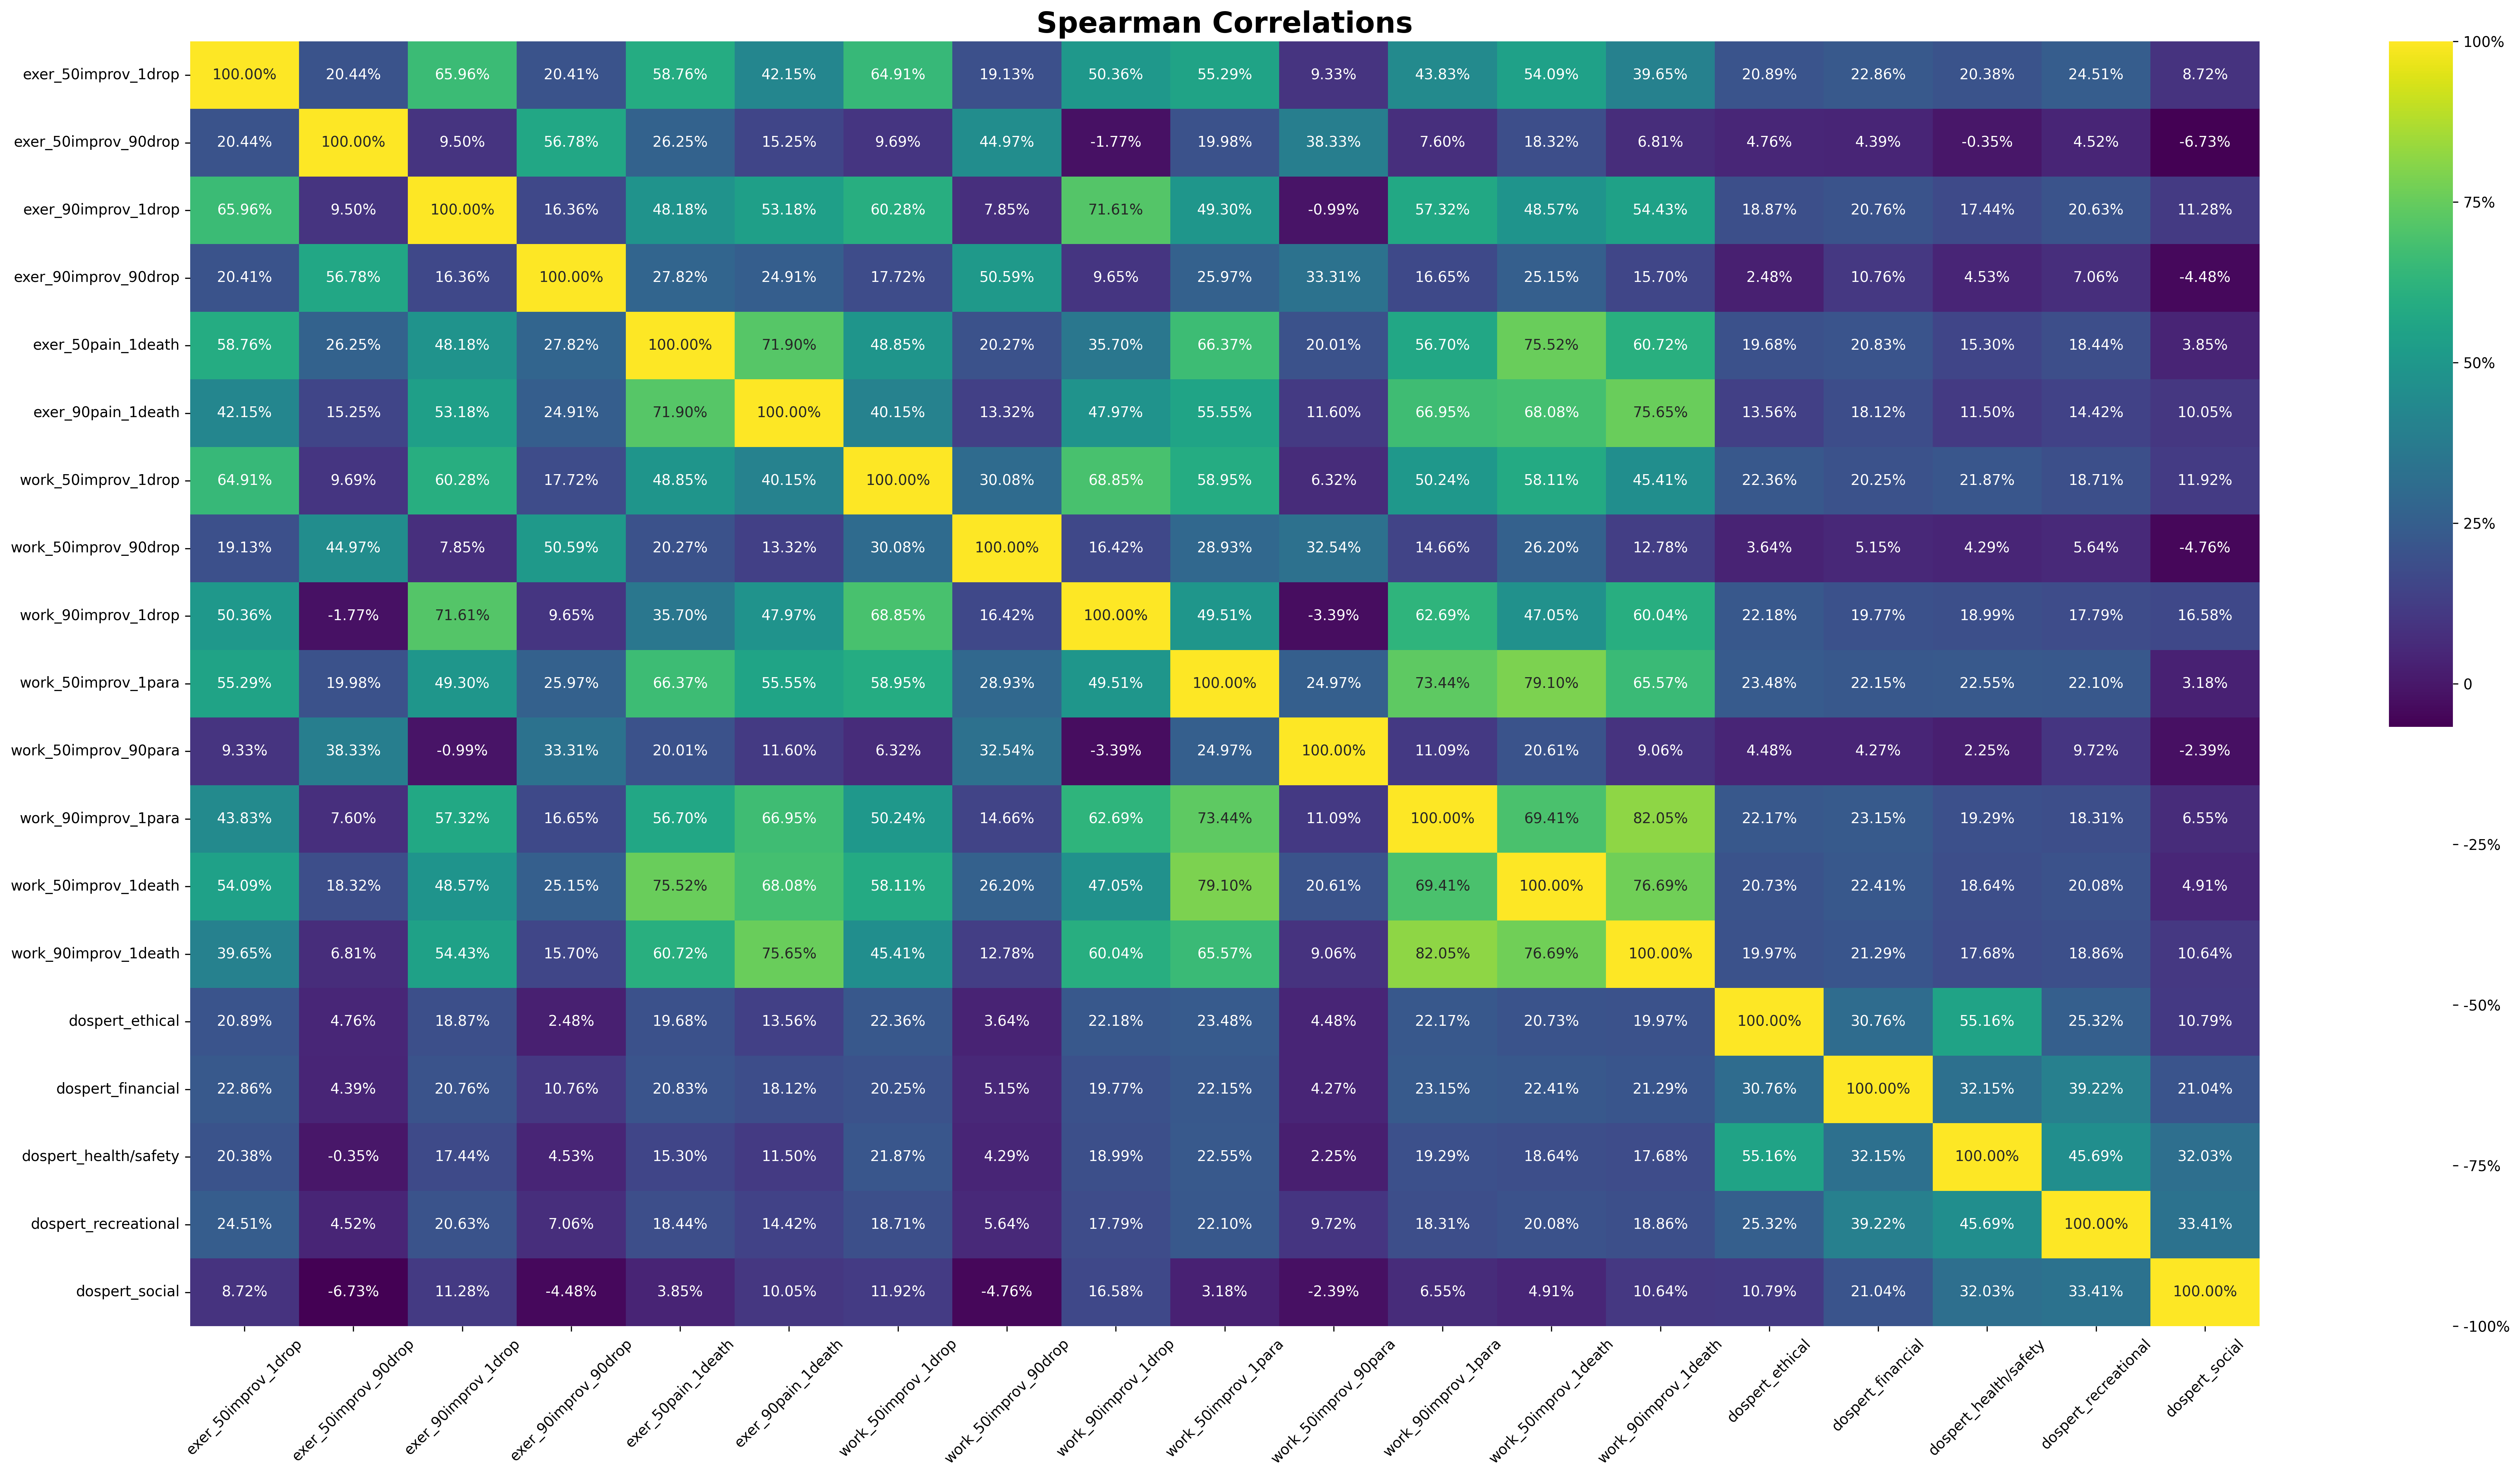

In [12]:
risk_dospert = df.filter(regex='(90|1)(drop|para|death)|dospert_').copy()
plt.figure(figsize=(32, 16), dpi=300)
ax = sns.heatmap(risk_dospert.corr(method='spearman'), annot=True, cmap='viridis', fmt='.2%')
plt.xticks(rotation=45)
plt.title('Spearman Correlations', fontsize=20, weight='bold')
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -.75, -.5, -.25, 0, .25, .5, .75, 1])
cbar.set_ticklabels(['-100%', '-75%', '-50%', '-25%', '0', '25%', '50%', '75%', '100%'])
plt.savefig(os.path.join(WD, 'figures/dospert_risk_correlations.png'), bbox_inches='tight')